In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("C:\\Users\\anski\\Desktop\\all_folder\\Datasets\\newplacementdata.csv")

In [3]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: xlabel='placement_exam_marks'>

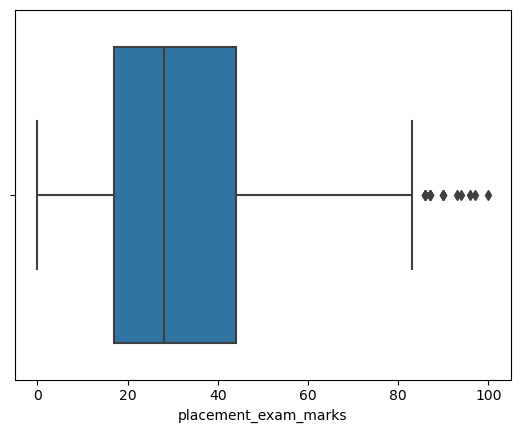

In [7]:
sns.boxplot(x=df['placement_exam_marks'])

In [10]:
#finding IQR
percentile25=df['placement_exam_marks'].quantile(0.25)
percentile75=df['placement_exam_marks'].quantile(0.75)

In [11]:
percentile25

17.0

In [12]:
percentile75

44.0

In [13]:
IQR=percentile75-percentile25

In [14]:
IQR

27.0

In [15]:
upperlimit=percentile75+1.5*IQR

In [16]:
lowerlimit=percentile25-1.5*IQR

In [17]:
upperlimit

84.5

In [18]:
lowerlimit

-23.5

# Finding OutLiers

In [19]:
df[df['placement_exam_marks']>upperlimit]

,cgpa,placement_exam_marks,placed
9,7.75,94,1
40,6.60,86,1
61,7.51,86,0
134,6.33,93,0
162,7.80,90,0
283,7.09,87,0
290,8.38,87,0
311,6.97,87,1
324,6.64,90,0
630,6.56,96,1


In [20]:
df[df['placement_exam_marks']<lowerlimit]

,cgpa,placement_exam_marks,placed


In [21]:
#Trimming

In [22]:
newdf=df[df['placement_exam_marks']<upperlimit]

In [23]:
newdf

,cgpa,placement_exam_marks,placed
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0
...,...,...,...
995,8.87,44,1
996,9.12,65,1
997,4.89,34,0
998,8.62,46,1


In [24]:
#comparison

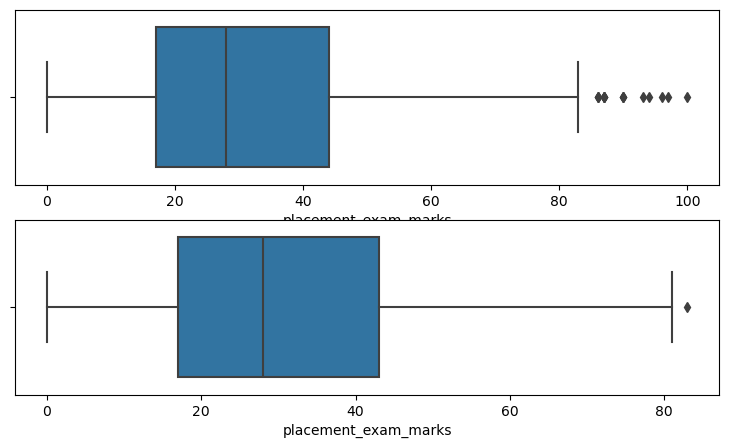

In [29]:
plt.figure(figsize = (20,5))

plt.subplot(222)
sns.boxplot(x = df['placement_exam_marks'])



plt.subplot(224)
sns.boxplot(x = newdf['placement_exam_marks'])
plt.show()

In [30]:
#capping

In [32]:
newdf_cap=df.copy()

In [33]:
newdf_cap['placement_exam_marks']=np.where(
    newdf_cap['placement_exam_marks']>upperlimit,
    upperlimit,

    np.where(
    newdf_cap['placement_exam_marks']<lowerlimit,
    lowerlimit,
    newdf_cap['placement_exam_marks'])
)

In [34]:
newdf_cap

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


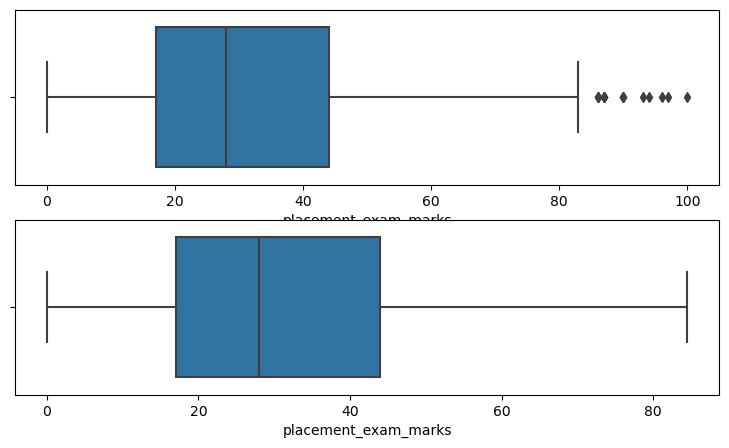

In [35]:
plt.figure(figsize = (20,5))

plt.subplot(222)
sns.boxplot(x = df['placement_exam_marks'])



plt.subplot(224)
sns.boxplot(x = newdf_cap['placement_exam_marks'])
plt.show()